# END TO END MACHINE LEEARNING PROJECT
## About the data
This data has metrics such as the population, median income, median housing price, and so 
on for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes 
sample data (a block group typically has a population of 600 to 3,000 people). We will just 
call them “districts” for short.<br>
Model should learn from this data and be able to predict the median housing price in 
any district, given all the other metrics.

## Load the data
Let's look how we load the data using pandas library.


In [2]:
import pandas as pd

In [239]:
Data=pd.read_csv("C:/Users/AJVAD K/Desktop/DS/SEM 2/ML/housing.csv")
housing=Data

## Take a quick look to data 
Let’s take a look at the top five rows using the DataFrame’s head() method.<br>


In [240]:
Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, 
total_rooms, total_bed rooms, population, households, median_income, median_house_value, and 
ocean_proximity.


In [235]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The info() method is useful to get a quick description of the data, in particular the total number of 
rows, and each attribute’s type and number of non-null values.<br>
Notice that the total_bed rooms attribute has only 20,433 non-null values, meaning that 207 
districts are missing this feature. We will need to take care of this later.

In [236]:
Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory.<br>
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the 
value below which a given percentage of observations in a group of observations falls.<br>
For example, 25% of the districts have a housing_median_age lower than 18, while 50% are 
lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st 
quartile), the median, and the 75th percentile (or 3rd quartile).

When we looked at the top five rows, you probably noticed that the values in that column 
were repetitive, which means that it is probably a categorical attribute.<br>
We can find out what categories exist and how many districts belong to each category by 
using the value_counts() method:

In [237]:
Data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Another quick way to get a feel of the type of data you are dealing with is to plot a 
histogram for each numerical attribute.<br>
A histogram shows the number of instances (on the vertical axis) that have a given value 
range (on the horizontal axis).<br>


In [8]:
import matplotlib.pyplot as plt

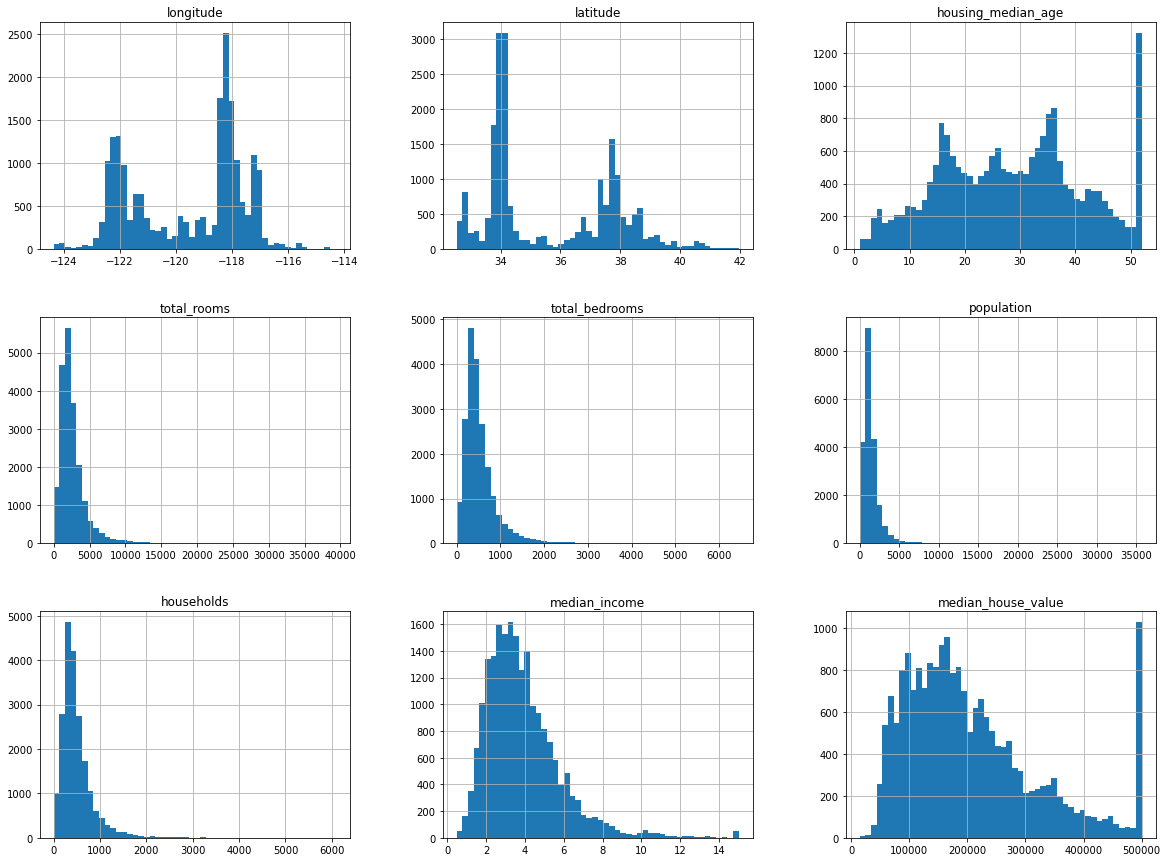

In [238]:
Data.hist(bins=50,figsize=(20,15))
plt.show()

From the plots, We can easly understand that these attributes have very different scales.<br>
The housing median age and the median house value were also capped. The latter may be a 
serious problem since it is your target attribute (your labels). Our Machine Learning 
algorithms may learn that prices never go beyond that limit. <br>
Finally, many histograms are tail heavy: they extend much farther to the right of the 
median than to the left. This may make it a bit harder for some Machine Learning 
algorithms to detect patterns. 

## Creat a test set
### Method 1
When we estimate the generalization error using the test set, our estimate will be too 
optimistic and we will launch a system that will not perform as well as expected. This is 
called data snooping bias.<br>
Creating a test set is theoretically quite simple: just pick some instances randomly, typically 
20% of the dataset, and set them aside.

In [11]:
import numpy as np

In [12]:
def traintestSplit(data,testratio):
    randomshuffle=np.random.permutation(len(data))
    testsize=int(len(data)*testratio)
    testIndices=randomshuffle[:testsize]
    trainIndices=randomshuffle[testsize:]
    return data.iloc[trainIndices],data.iloc[testIndices]

In [13]:
traindata,testdata=traintestSplit(housing,0.2)

In [14]:
traindata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7404,-118.21,33.96,39.0,2050.0,529.0,1959.0,485.0,2.1389,168900.0,<1H OCEAN
10098,-117.95,33.93,25.0,3445.0,801.0,2400.0,750.0,3.4702,161900.0,<1H OCEAN
9503,-123.39,38.99,28.0,1416.0,294.0,812.0,258.0,3.4063,109400.0,<1H OCEAN
2611,-123.88,40.93,28.0,1272.0,259.0,519.0,220.0,3.2891,106300.0,<1H OCEAN
16967,-122.31,37.54,49.0,1340.0,281.0,660.0,284.0,4.1630,393800.0,NEAR OCEAN


### Method 2
This ensures that the test set will remain consistent across multiple runs, even if we refresh 
the dataset. 

In [15]:

import hashlib

In [16]:
def test_set_check(identifier,testratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*testratio

In [17]:
def test_set_by_id_column(data,id_column,testratio,hash=hashlib.md5):
    id_s=data[id_column]
    in_test_check=id_s.apply(lambda id_:test_set_check(id_,testratio,hash))
    return data.loc[~in_test_check],data.loc[in_test_check]

In [18]:
housing_with_id=housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
traindata2,testdata2=test_set_by_id_column(housing_with_id,"index",0.2)

### METHOD 3


In [20]:
from sklearn.model_selection import train_test_split
traindata3,testdata3=train_test_split(housing,test_size=0.2,random_state=34)

### Method 4
This is called stratified sampling: the population is divided into homogeneous subgroups called 
strata, and the right number of instances is sampled from each stratum to guarantee that the test 
set is representative of the overall population.<br><br>

The following code creates an income category attribute by dividing the median income by 1.5 
(to limit the number of income categories) and rounding up using ceil (to have discrete 
categories), and then merging all the categories greater than 5 into category 5:


In [241]:

Data["income_cat"]=np.ceil(Data["median_income"]/1.5)
Data["income_cat"].where(Data["income_cat"]<5,5.0,inplace=True)

In [242]:
Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [243]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [244]:
for train,test in split.split(Data,Data["income_cat"]):
    StratTrain=Data.loc[train]
    StratTest=Data.loc[test]

In [245]:
StratTrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0


In [246]:
StratTest

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2.0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2.0
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4.0


##  DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS
First, make sure you have put the test set aside and you are only exploring the training 
set. Also, if the training set is very large, you may want to sample an exploration set, to 
make manipulations easy and fast.<br>
In our case, the set is quite small so you can just work directly on the full set. Let’s create 
a copy so you can play with it without harming the training set:

In [22]:
housing=traindata3.copy()

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

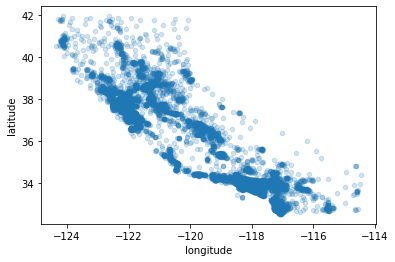

In [24]:
housing.plot(kind="scatter",x='longitude',y="latitude",alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

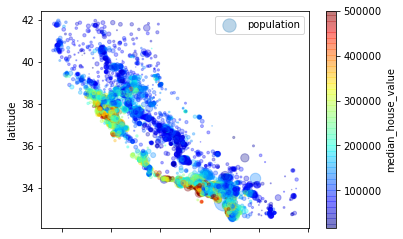

In [25]:
housing.plot(kind="scatter",x="longitude",y="latitude",s=housing["population"]/100,alpha=0.3,label="population",cmap=plt.get_cmap("jet"),c="median_house_value",colorbar=True)


This image tells that the housing 
prices are very much related to the 
location (e.g., close to the ocean) and to 
the population density, as you probably 
knew already.<br>
It will probably be useful to use a 
clustering algorithm to detect the main 
clusters and add new features that 
measure the proximity to the cluster 
centers.


### Looking for correlation
Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called 
Pearson’s r) between every pair of attributes using the corr() method:

In [26]:
correlationmatrix=housing.corr()

In [27]:
correlationmatrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686797
total_rooms           0.138636
housing_median_age    0.099998
households            0.070040
total_bedrooms        0.053397
population           -0.021625
longitude            -0.042718
latitude             -0.146174
Name: median_house_value, dtype: float64

When it is close to 1, it means that there is a strong 
positive correlation; for example, the median house 
value tends to go up when the median income goes up.<br>
When the coefficient is close to –1, it means that there is 
a strong negative correlation; we can see a small 
negative correlation between the latitude and the 
median house value (i.e., prices have a slight tendency 
to go down when you go north). 

### Panda's Scatter plotting

In [28]:
from pandas.plotting import scatter_matrix

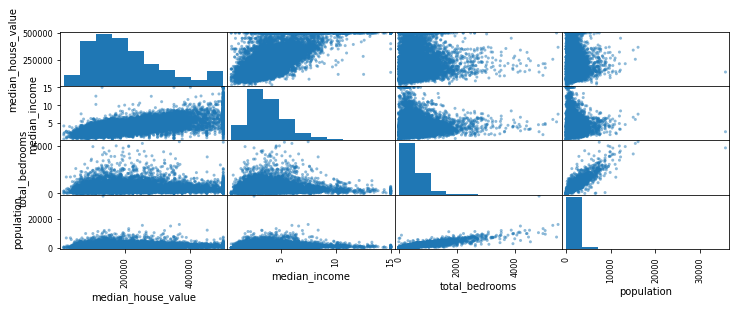

In [29]:
atributes=["median_house_value","median_income","total_bedrooms","population"]
scatter_matrix(housing[atributes],figsize=(12,4))
plt.show()

### Experimenting with various attribute combinations
For example, the total number of rooms in a district is not very useful if we don’t know 
how many households there are. What we really want is the number of rooms per 
household.<br>
Similarly, the total number of bedrooms by itself is not very useful: you probably want to 
compare it to the number of rooms. And the population per household also seems like an 
interesting attribute combination to look at.



In [247]:
Train=StratTrain.copy()
Train["room_per_househoulds"]=Train["total_rooms"]/Train["households"]
Train["bedroom_per_room"]=Train["total_bedrooms"]/Train["total_rooms"]
Train["population_per_households"]=Train["population"]/Train["households"]

In [248]:
Train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_per_househoulds,bedroom_per_room,population_per_households
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,4.505810,0.231341,3.047847


In [249]:
Train.corr()["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
income_cat                   0.642274
room_per_househoulds         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedroom_per_room            -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house 
value than the total number of rooms or bedrooms.<br>
Apparently houses with a lower bedroom/room ratio tend to be more expensive.

## Prepare the data for machine learning


In [250]:
housing=StratTrain.drop("median_house_value",axis=1)
housing_labels=StratTrain["median_house_value"].copy()

In [251]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_cat          16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [252]:
median=housing["total_bedrooms"].median()
housing["total_bedrooms"]=housing["total_bedrooms"].fillna(median)

In [253]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_cat          16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


Scikit-Learn provides a handy class to take care of missing values: Imputer. <br>
First, you need to create an Imputer instance, specifying that you want to replace each attribute’s 
missing values with the median of that attribute:

In [190]:
from sklearn.impute import SimpleImputer

In [255]:
imputer=SimpleImputer(strategy="median")

In [256]:
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [257]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [258]:
housing.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [259]:
X=imputer.fit_transform(housing_num)

In [261]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [262]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any 
missing values in new data after the system goes live, so it is safer to apply the imputer to all the 
numerical attributes

### Handling text and Catogorical attributes
Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot 
compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s 
convert these text labels to numbers.<br>
Scikit-Learn provides a transformer for this task called LabelEncoder:

In [127]:
from sklearn.preprocessing import LabelEncoder

In [197]:
encoder=LabelEncoder()

In [198]:
housingCat=housing["ocean_proximity"]
encoded=encoder.fit_transform(housingCat)

In [199]:
housingCat.shape

(16512,)

In [200]:
encoded

array([0, 0, 4, ..., 1, 0, 3])

We can apply both transformations (from text categories to integer categories, then from integer categories to 
one-hot vectors) in one shot using the LabelBinarizer class:


In [131]:
from sklearn.preprocessing import LabelBinarizer

In [263]:
Binarizer=LabelBinarizer()
housing_cat = housing["ocean_proximity"]
onehotbinarizer=Binarizer.fit_transform(housing_cat)
onehotbinarizer

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

Standardization is quite different: first it subtracts the mean value (so standardized values 
always have a zero mean), and then it divides by the variance so that the resulting 
distribution has unit variance. <br>
 Scikit-Learn provides a transformer called StandardScaler for standardization
### Transformation pipelines

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [264]:
num_pipeline=Pipeline([
    ("imputer",SimpleImputer()),
    ("scaler",StandardScaler())
])

In [265]:
housing_prepared=num_pipeline.fit_transform(housing_num)

In [266]:
hp=np.concatenate((housing_prepared,onehotbinarizer),axis=1)
hp

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Scikit-Learn provides a FeatureUnion class for this. You give it a list of transformers (which 
can be entire transformer pipelines), and when its transform() method is called it runs each 
transformer’s transform() method in parallel, waits for their output, and then concatenates 
them and returns the result (and of course calling its fit() method calls all each transformer’s 
fit() method).

## Training and evaluating on training set

In [267]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(hp,housing_labels)


LinearRegression()

In [268]:
predicted=lin_model.predict(hp)
predicted

array([205841.96139906, 329060.05217695, 205219.96047357, ...,
       100690.6084635 , 215934.8748381 , 278815.04829906])

In [223]:
housing_label

7067     181100.0
18972    191300.0
10877    165300.0
20440    308100.0
15424    156900.0
           ...   
16708    346100.0
3157      82200.0
10730    500000.0
5242     500001.0
11681    165100.0
Name: median_house_value, Length: 16512, dtype: float64

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s
mean_squared_error function:

In [269]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(housing_label,predicted)
linrmse=np.sqrt(lin_mse)
linrmse


147370.6911060255


Let’s train a **DecisionTreeRegressor**. This is a powerful model, capable of finding complex 
nonlinear relationships in the data. The code should look familiar by now:

In [270]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(hp, housing_label)

DecisionTreeRegressor()

In [271]:
housing_predictions = tree_reg.predict(hp)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Of course, it is 
much more likely that the model has badly overfit the data.<br>
One way to evaluate the Decision Tree model would be to use the train_test_split function to 
split the training set into a smaller training set and a validation set, then train your models 
against the smaller training set and evaluate them against the validation set.<br>
The following code performs K-fold cross-validation: it randomly splits the training set into 10 
distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, 
picking a different fold for evaluation every time and training on the other 9 folds.<br>
Note: Scikit-Learn cross-validation features expect a utility function (greater is better) rather 
than a cost function (lower is better), so the scoring function is actually the opposite of the 
MSE (i.e., a negative value), which is why the preceding code computes –scores before 
calculating the square root.


In [272]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, hp, housing_label,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [273]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) 
display_scores(rmse_scores)

Scores: [164769.18516813 171985.50165253 163762.87800269 165749.24715624
 165396.75982828 165438.99537157 169088.81267259 167260.40220334
 170295.88629541 168155.16813148]
Mean: 167190.28364822693
Standard deviation: 2512.9338719198213


Now the Decision Tree doesn’t look as good as it did earlier

Let’s try one last model now: the RandomForestRegressor.
<br>Random Forests work by training many 
Decision Trees on random subsets of the features, then averaging out their predictions. 
Building a model on top of many other models is called Ensemble Learning, and it is often a great way 
to push ML algorithms even further. We will skip most of the code since it is essentially the same as for 
the other models:

In [274]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(hp, housing_label)


RandomForestRegressor()

In [279]:
forest_predictions = forest_reg.predict(hp)
forest_mse = mean_squared_error(housing_label, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

44231.88002352514

In [277]:
housing_label


7067     181100.0
18972    191300.0
10877    165300.0
20440    308100.0
15424    156900.0
           ...   
16708    346100.0
3157      82200.0
10730    500000.0
5242     500001.0
11681    165100.0
Name: median_house_value, Length: 16512, dtype: float64

In [280]:
forest_predictions

array([187721.01, 205017.02, 186208.  , ..., 400276.01, 388625.64,
       183138.01])

## Grid Search

One way to do that would be to fiddle with the hyperparameters manually, until you find a 
great combination of hyperparameter values. 

This would be very tedious work, and you may not have time to explore many 
combinations.

Instead you should get Scikit-Learn’s GridSearchCV to search for you. 

All you need to do is tell it which hyperparameters you want it to experiment with, and 
what values to try out, and it will evaluate all the possible combinations of hyperparameter 
values, using cross-validation. 

For example, the following code searches for the best combination of hyperparameter values 
for the RandomForestRegressor:

Note: When you have no idea what value a hyperparameter should have, a simple approach 
is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained 
search, as shown in this example with the n_estimators hyperparameter)

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
param_grid=[
    {"n_estimators":[3,10,30],"max_features":[2,4,5,6]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,4,5]}
]

In [284]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")


In [285]:
grid_search.fit(hp,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 5, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 5],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of 
n_estimators and max_features hyperparameter values specified in the first dict , then try all 
2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the 
bootstrap hyperparameter set to False instead of True (which is the default value for this 
hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor
hyperparameter values, and it will train each model five times (since we are using five-fold 
cross validation).

 In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long 
time, but when it is done you can get the best combination of parameters like this

In [286]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Since 30 is the maximum value of n_estimators that was evaluated, you should 
probably evaluate higher values as well, since the score may continue to improve

In [287]:
cvres=grid_search.cv_results_
for mean_score,param in zip(cvres["mean_test_score"],cvres["params"]):
        print (np.sqrt(-mean_score),param)

64129.55139429231 {'max_features': 2, 'n_estimators': 3}
57086.03067474373 {'max_features': 2, 'n_estimators': 10}
53996.416195495614 {'max_features': 2, 'n_estimators': 30}
61977.656004300115 {'max_features': 4, 'n_estimators': 3}
54442.785112995465 {'max_features': 4, 'n_estimators': 10}
52458.052989325006 {'max_features': 4, 'n_estimators': 30}
60585.82141641998 {'max_features': 5, 'n_estimators': 3}
53825.38763612151 {'max_features': 5, 'n_estimators': 10}
51721.54609792058 {'max_features': 5, 'n_estimators': 30}
60444.54811474545 {'max_features': 6, 'n_estimators': 3}
53513.57883580776 {'max_features': 6, 'n_estimators': 10}
51636.58525815516 {'max_features': 6, 'n_estimators': 30}
63484.890187081124 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55287.8326222199 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59905.85039475123 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
53714.6483027905 {'bootstrap': False, 'max_features': 4, 'n_estimators':

## Evaluate your system on the test set

In [289]:
final_model=grid_search.best_estimator_

In [290]:
X_test=StratTest.drop("median_house_value",axis=1)

In [291]:
Y_test=StratTest["median_house_value"].copy()

In [293]:
cat_test=X_test["ocean_proximity"]

In [294]:
num_test=X_test.drop("ocean_proximity",axis=1)

In [295]:
hp2=num_pipeline.transform(num_test)

In [297]:
hot2=Binarizer.transform(cat_test)

In [298]:
hpneed=np.concatenate((hp2,hot2),axis=1)

In [299]:
predict4=final_model.predict(hpneed)

In [301]:
error=mean_squared_error(Y_test,predict4)

In [302]:
rmse=np.sqrt(error)
rmse

49444.69563742982

• The performance will usually be slightly worse than what you measured using 
crossvalidation if you did a lot of hyperparameter tuning (because your system ends up 
fine-tuned to perform well on the validation data, and will likely not perform as well on 
unknown datasets). 

• It is not the case in this example, but when this happens you must resist the temptation to 
tweak the hyperparameters to make the numbers look good on the test set; the 
improvements would be unlikely to generalize to new data.

• Now comes the project prelaunch phase: you need to present your solution (highlighting 
what you have learned, what worked and what did not, what assumptions were made, and 
what your system’s limitations are), document everything, and create nice presentations 
with clear visualizations and easy-to-remember statements (e.g., “the median income is the 
number one predictor of housing prices”).